# Session 3 — Sentence-Level Analysis
## Measure 4: Clause Density / Subordination

Long sentences are not always complex, sometimes they are just lists. Clause density (how many finite verbs or subordinating markers per sentence) is another proxy for complexity.

**What is a clause?**
A clause is a unit of grammar containing a subject and a predicate (verb). There are two main types:
- **Independent clause**: Can stand alone as a complete sentence (e.g., "Alice fell down the rabbit hole")
- **Subordinate clause**: Cannot stand alone and depends on the main clause (e.g., "when she saw the White Rabbit")

**Why measure clause density?**
- **Syntactic complexity**: More subordinate clauses = more complex sentence structure
- **Cognitive load**: Sentences with multiple embedded clauses are harder to process
- **Writing maturity**: Advanced writers tend to use more subordination to express nuanced relationships between ideas
- **Genre differences**: Academic writing typically has higher clause density than fiction

**How we measure it:**
We count subordinating conjunctions and relative pronouns (that, which, who, when, where, because, although, if, while, etc.) as proxies for subordinate clauses. Each marker typically introduces a dependent clause that adds information to the main clause.

This notebook:
- splits into sentences
- counts clause-like elements using regex for conjunctions (that, which, because, when, if, while, etc.)
- computes clauses per sentence

We'll analyze Lewis Carroll's two Alice books to compare their syntactic complexity.

In [10]:
import re

# Load the Alice books from Project Gutenberg
def load_book(filepath):
    """Load and clean book text from Project Gutenberg"""
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
    
    # Remove Project Gutenberg headers/footers
    if 'CHAPTER I' in text:
        start = text.find('CHAPTER I')
        text = text[start:]
    elif '*** START OF' in text:
        start = text.find('*** START OF')
        text = text[start + 100:]
    
    if '*** END OF' in text:
        end = text.find('*** END OF')
        text = text[:end]
    elif 'End of Project Gutenberg' in text:
        end = text.find('End of Project Gutenberg')
        text = text[:end]
    
    return text.strip()

# Load both books
wonderland_text = load_book('../data/Wonderland.txt')
looking_glass_text = load_book('../data/Looking-Glass.txt')

print(f"Alice's Adventures in Wonderland loaded: {len(wonderland_text):,} characters")
print(f"Through the Looking-Glass loaded: {len(looking_glass_text):,} characters")

Alice's Adventures in Wonderland loaded: 144,481 characters
Through the Looking-Glass loaded: 161,373 characters


In [11]:
# Define clause markers (subordinating conjunctions and relative pronouns)
clause_markers = r'\b(that|which|who|whom|whose|where|when|while|if|because|although|though|unless|until|since|before|after|as)\b'

def analyze_clause_density(text, book_name, show_examples=5):
    """Analyze clause density in the text"""
    # Split into sentences
    sentences = re.split(r'[.!?]+\s+', text.strip())
    sentences = [s.strip() for s in sentences if s.strip() and len(s.split()) > 2]
    
    clause_counts = []
    clause_densities = []
    
    for s in sentences:
        # Count clause markers (each marker typically introduces a subordinate clause)
        num_markers = len(re.findall(clause_markers, s, flags=re.IGNORECASE))
        # Base clause + subordinate clauses
        clauses = 1 + num_markers
        tokens = len(s.split())
        density = clauses / (tokens / 10) if tokens > 0 else 0
        
        clause_counts.append(clauses)
        clause_densities.append(density)
    
    avg_clauses = sum(clause_counts) / len(clause_counts)
    avg_density = sum(clause_densities) / len(clause_densities)
    
    print(f"\n{'='*70}")
    print(f"{book_name}")
    print(f"{'='*70}")
    print(f"Total sentences analyzed: {len(sentences):,}")
    print(f"Average clauses per sentence: {avg_clauses:.2f}")
    print(f"Average clause density (clauses per 10 tokens): {avg_density:.2f}")
    
    # Show examples of complex sentences
    print(f"\nTop {show_examples} most complex sentences (by clause count):")
    print("-" * 70)
    
    # Sort sentences by clause count
    sentence_data = list(zip(sentences, clause_counts, [len(s.split()) for s in sentences]))
    sentence_data.sort(key=lambda x: x[1], reverse=True)
    
    for i, (sent, clauses, tokens) in enumerate(sentence_data[:show_examples], 1):
        # Truncate long sentences
        display_sent = sent if len(sent) < 150 else sent[:147] + "..."
        print(f"\n{i}. {display_sent}")
        print(f"   Tokens: {tokens}, Clauses: {clauses}, Density: {clauses/(tokens/10):.2f}")
    
    return clause_counts, clause_densities

# Analyze both books
wonderland_counts, wonderland_densities = analyze_clause_density(wonderland_text, "Alice's Adventures in Wonderland")
looking_glass_counts, looking_glass_densities = analyze_clause_density(looking_glass_text, "Through the Looking-Glass")


Alice's Adventures in Wonderland
Total sentences analyzed: 931
Average clauses per sentence: 2.09
Average clause density (clauses per 10 tokens): 1.03

Top 5 most complex sentences (by clause count):
----------------------------------------------------------------------

1. “You might just as well
say that ‘I see what I eat’ is the same thing as ‘I eat what I see’!”

“You might just as well say,” added the March Hare, ...
   Tokens: 119, Clauses: 15, Density: 1.26

2. I suppose you’ll be telling me next that you never
tasted an egg!”

“I _have_ tasted eggs, certainly,” said Alice, who was a very truthful
child; “...
   Tokens: 163, Clauses: 12, Density: 0.74

3. Alice folded her hands, and began:—

“You are old, Father William,” the young man said,
    “And your hair has become very white;
And yet you inces...
   Tokens: 260, Clauses: 11, Density: 0.42

4. “No, I’ll look first,” she said,
“and see whether it’s marked ‘_poison_’ or not”; for she had read
several nice little histories a

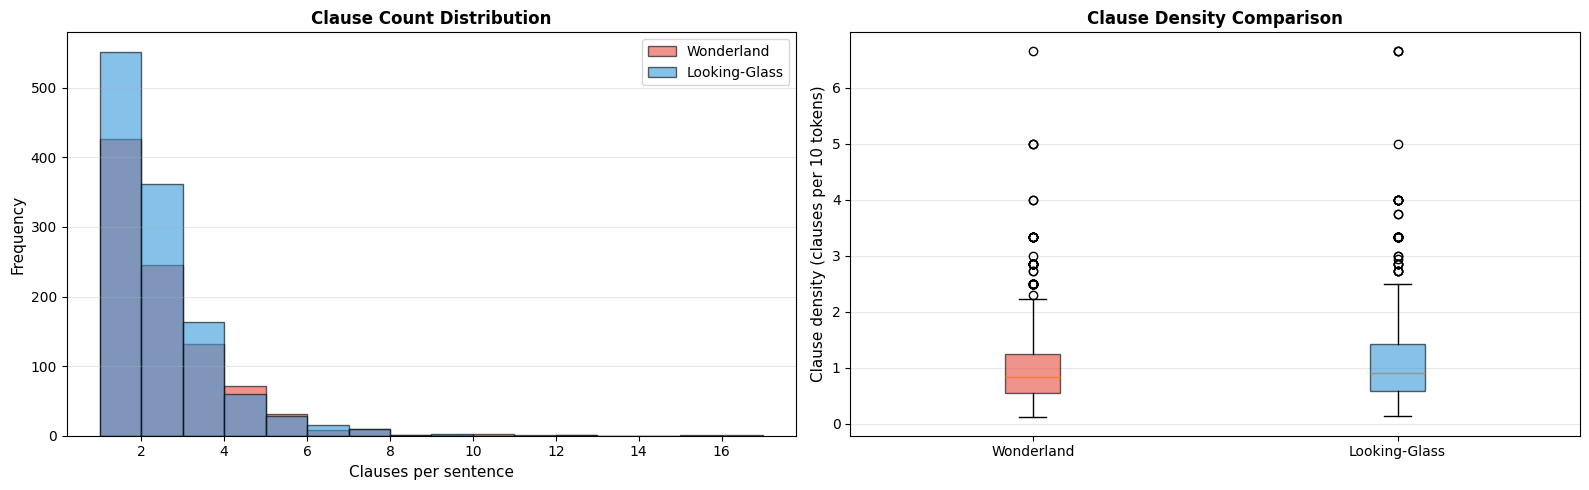


STATISTICAL COMPARISON
Metric                                   Wonderland   Looking-Glass
----------------------------------------------------------------------
Avg clauses per sentence                       2.09            1.98
Avg clause density                             1.03            1.11
Max clauses in one sentence                      15              16
Sentences with 3+ clauses                       259             281


In [12]:
# Visualize clause density comparison
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram of clause counts
ax1 = axes[0]
ax1.hist(wonderland_counts, bins=range(1, max(max(wonderland_counts), max(looking_glass_counts))+2), 
         alpha=0.6, color='#e74c3c', label='Wonderland', edgecolor='black')
ax1.hist(looking_glass_counts, bins=range(1, max(max(wonderland_counts), max(looking_glass_counts))+2), 
         alpha=0.6, color='#3498db', label='Looking-Glass', edgecolor='black')
ax1.set_xlabel('Clauses per sentence', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Clause Count Distribution', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Box plot comparison
ax2 = axes[1]
box_data = [wonderland_densities, looking_glass_densities]
bp = ax2.boxplot(box_data, tick_labels=['Wonderland', 'Looking-Glass'], patch_artist=True)
bp['boxes'][0].set_facecolor('#e74c3c')
bp['boxes'][0].set_alpha(0.6)
bp['boxes'][1].set_facecolor('#3498db')
bp['boxes'][1].set_alpha(0.6)
ax2.set_ylabel('Clause density (clauses per 10 tokens)', fontsize=11)
ax2.set_title('Clause Density Comparison', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistical summary
print("\n" + "="*70)
print("STATISTICAL COMPARISON")
print("="*70)
print(f"{'Metric':<35} {'Wonderland':>15} {'Looking-Glass':>15}")
print("-"*70)
print(f"{'Avg clauses per sentence':<35} {np.mean(wonderland_counts):>15.2f} {np.mean(looking_glass_counts):>15.2f}")
print(f"{'Avg clause density':<35} {np.mean(wonderland_densities):>15.2f} {np.mean(looking_glass_densities):>15.2f}")
print(f"{'Max clauses in one sentence':<35} {max(wonderland_counts):>15} {max(looking_glass_counts):>15}")
print(f"{'Sentences with 3+ clauses':<35} {sum(1 for c in wonderland_counts if c >= 3):>15} {sum(1 for c in looking_glass_counts if c >= 3):>15}")